In [1]:
%pip install tensorflow==2.9.0
%pip install ampligraph
%pip install networkx
%pip install matplotlib

   ---------------------------------------- 0.0/444.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/444.1 MB ? eta -:--:--
   ---------------------------------------- 0.3/444.1 MB ? eta -:--:--
   ---------------------------------------- 1.0/444.1 MB 3.4 MB/s eta 0:02:12
   ---------------------------------------- 1.3/444.1 MB 3.0 MB/s eta 0:02:26
   ---------------------------------------- 1.6/444.1 MB 1.9 MB/s eta 0:03:58
   ---------------------------------------- 1.8/444.1 MB 1.9 MB/s eta 0:03:58
   ---------------------------------------- 2.1/444.1 MB 1.8 MB/s eta 0:04:01
   ---------------------------------------- 2.4/444.1 MB 1.8 MB/s eta 0:04:11
   ---------------------------------------- 3.1/444.1 MB 1.8 MB/s eta 0:04:00
   ---------------------------------------- 3.4/444.1 MB 1.9 MB/s eta 0:03:52
   ---------------------------------------- 3.4/444.1 MB 1.9 MB/s eta 0:03:52
   ---------------------------------------- 3.9/444.1 MB 1.7 MB/s eta 0:04:19
   ----

In [38]:
import numpy as np
import pandas as pd
import ampligraph
import tensorflow as tf

## Dataset


In [ ]:
import pandas as pd

df = pd.read_csv("game_sales.csv", encoding='utf-8', sep=',')
df.head()


,Game,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41490000.0,292000000,3770000.0,8460000.0,82740000.0
1,Super Mario Bros.,NES,1985,Platform,Nintendo,298000000.0,3580000,6810000.0,770000.0,40240000.0
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15850000.0,12880000,3790000.0,3310000.0,35820000.0
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15750000.0,111000000,3280000.0,2960000.0,33000000.0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11270000.0,8890000,10220000.0,1000000.0,31370000.0


In [2]:
df.isna().sum()

Game            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

Все значения ненулевые

## Создание графа знаний

In [ ]:
import pandas as pd


df = pd.read_csv("game_sales.csv", encoding='utf-8', sep=',')

triples = []

for i, row in df.iterrows():
    game_name = row["Game"]

    if pd.notna(row["Platform"]):
        platform = (game_name, "releasedOnPlatform", row["Platform"])
        triples.append(platform)
    if pd.notna(row["Year"]):
        year = (game_name, "releasedInYear", row["Year"])
        triples.append(year)
    if pd.notna(row["Genre"]):
        genre = (game_name, "belongsToGenre", row["Genre"])
        triples.append(genre)
    if pd.notna(row["Publisher"]):
        publisher = (game_name, "publishedBy", row["Publisher"])
        triples.append(publisher)
    if pd.notna(row["NA_Sales"]):
        na_sales = (game_name, "soldInNA", row["NA_Sales"])
        triples.append(na_sales)
    if pd.notna(row["EU_Sales"]):
        eu_sales = (game_name, "soldInEU", row["EU_Sales"])
        triples.append(eu_sales)
    if pd.notna(row["JP_Sales"]):
        jp_sales = (game_name, "soldInJP", row["JP_Sales"])
        triples.append(jp_sales)
    if pd.notna(row["Other_Sales"]):
        other_sales = (game_name, "soldInOtherRegions", row["Other_Sales"])
        triples.append(other_sales)
    if pd.notna(row["Global_Sales"]):
        global_sales = (game_name, "soldGlobally", row["Global_Sales"])
        triples.append(global_sales)

for triple in triples[:20]:
    print(triple)


('Wii Sports', 'releasedOnPlatform', 'Wii')
('Wii Sports', 'releasedInYear', 2006)
('Wii Sports', 'belongsToGenre', 'Sports')
('Wii Sports', 'publishedBy', 'Nintendo')
('Wii Sports', 'soldInNA', 41490000.0)
('Wii Sports', 'soldInEU', 292000000)
('Wii Sports', 'soldInJP', 3770000.0)
('Wii Sports', 'soldInOtherRegions', 8460000.0)
('Wii Sports', 'soldGlobally', 82740000.0)
('Super Mario Bros.', 'releasedOnPlatform', 'NES')
('Super Mario Bros.', 'releasedInYear', 1985)
('Super Mario Bros.', 'belongsToGenre', 'Platform')
('Super Mario Bros.', 'publishedBy', 'Nintendo')
('Super Mario Bros.', 'soldInNA', 298000000.0)
('Super Mario Bros.', 'soldInEU', 3580000)
('Super Mario Bros.', 'soldInJP', 6810000.0)
('Super Mario Bros.', 'soldInOtherRegions', 770000.0)
('Super Mario Bros.', 'soldGlobally', 40240000.0)
('Mario Kart Wii', 'releasedOnPlatform', 'Wii')
('Mario Kart Wii', 'releasedInYear', 2008)


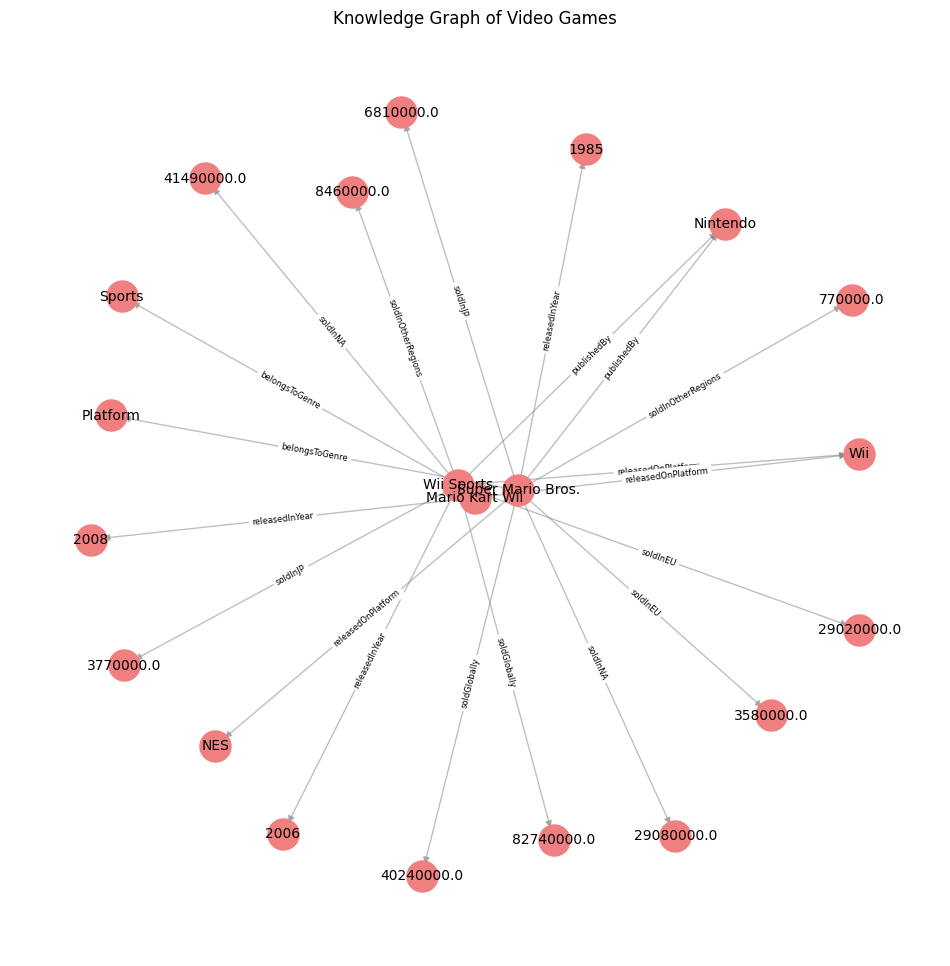

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

max_triples = 20

for i, triple in enumerate(triples):
    if i >= max_triples:
        break

    subject, predicate, object_ = triple

    if subject not in G:
        G.add_node(subject)
    if object_ not in G:
        G.add_node(object_)

    G.add_edge(subject, object_, label=predicate)

pos = nx.spring_layout(G, seed=42)  

plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, pos, node_color='lightcoral', node_size=500)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=1.0, alpha=0.5, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['label'] for u, v, d in G.edges(data=True)}, font_size=6)

plt.title("Knowledge Graph of Video Games")
plt.axis("off")  
plt.show()



In [ ]:
import pandas as pd

df = pd.read_csv("game_sales.csv")

triplets = []

for index, row in df.iterrows():
    game_name = row["Game"]
    
    if pd.notna(row["Platform"]):
        triplets.append((game_name, "releasedOnPlatform", row["Platform"]))
    
    if pd.notna(row["Year"]):
        triplets.append((game_name, "releasedInYear", row["Year"]))
    
    if pd.notna(row["Genre"]):
        triplets.append((game_name, "belongsToGenre", row["Genre"]))
    
    if pd.notna(row["Publisher"]):
        triplets.append((game_name, "publishedBy", row["Publisher"]))
    
    if pd.notna(row["NA_Sales"]):
        triplets.append((game_name, "soldInNA", row["NA_Sales"]))
    
    if pd.notna(row["EU_Sales"]):
        triplets.append((game_name, "soldInEU", row["EU_Sales"]))
    
    if pd.notna(row["JP_Sales"]):
        triplets.append((game_name, "soldInJP", row["JP_Sales"]))
    
    if pd.notna(row["Other_Sales"]):
        triplets.append((game_name, "soldInOtherRegions", row["Other_Sales"]))
    
    if pd.notna(row["Global_Sales"]):
        triplets.append((game_name, "soldGlobally", row["Global_Sales"]))

triplets_df = pd.DataFrame(triplets, columns=["subject", "predicate", "object"])

print(triplets_df)


                 subject           predicate     object
0             Wii Sports  releasedOnPlatform        Wii
1             Wii Sports      releasedInYear       2006
2             Wii Sports      belongsToGenre     Sports
3             Wii Sports         publishedBy   Nintendo
4             Wii Sports            soldInNA 41,490,000
...                  ...                 ...        ...
146614  Spirits & Spells            soldInNA  1,000,000
146615  Spirits & Spells            soldInEU          0
146616  Spirits & Spells            soldInJP          0
146617  Spirits & Spells  soldInOtherRegions          0
146618  Spirits & Spells        soldGlobally  1,000,000

[146619 rows x 3 columns]


## Тренировка эмбедингов в графе знаний

In [ ]:
import numpy as np
import tensorflow as tf
from ampligraph.latent_features import ScoringBasedEmbeddingModel
from ampligraph.latent_features.loss_functions import get as get_loss
from ampligraph.latent_features.regularizers import get as get_regularizer
from ampligraph.evaluation import train_test_split_no_unseen
import pandas as pd

df = pd.read_csv("game_sales.csv")
triplets = []

for index, row in df.iterrows():
    game_name = row["Game"]
    if pd.notna(row["Platform"]):
        triplets.append((game_name, "releasedOnPlatform", row["Platform"]))
    if pd.notna(row["Year"]):
        triplets.append((game_name, "releasedInYear", row["Year"]))
    if pd.notna(row["Genre"]):
        triplets.append((game_name, "belongsToGenre", row["Genre"]))
    if pd.notna(row["Publisher"]):
        triplets.append((game_name, "publishedBy", row["Publisher"]))
    if pd.notna(row["NA_Sales"]):
        triplets.append((game_name, "soldInNA", row["NA_Sales"]))
    if pd.notna(row["EU_Sales"]):
        triplets.append((game_name, "soldInEU", row["EU_Sales"]))
    if pd.notna(row["JP_Sales"]):
        triplets.append((game_name, "soldInJP", row["JP_Sales"]))
    if pd.notna(row["Other_Sales"]):
        triplets.append((game_name, "soldInOtherRegions", row["Other_Sales"]))
    if pd.notna(row["Global_Sales"]):
        triplets.append((game_name, "soldGlobally", row["Global_Sales"]))

triplets_np = np.array(triplets)

X_train, X_valid = train_test_split_no_unseen(triplets_np, test_size=0.2)  

print('Train set size: ', X_train.shape)
print('Validation set size: ', X_valid.shape)

model = ScoringBasedEmbeddingModel(k=100,  
                                   eta=20,
                                   scoring_type='ComplEx',
                                   seed=0)

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
loss = get_loss('multiclass_nll')
regularizer = get_regularizer('LP', {'p': 3, 'lambda': 1e-5})

model.compile(optimizer=optimizer, loss=loss, entity_relation_regularizer=regularizer)

model.fit(X_train,
          batch_size=int(X_train.shape[0] / 50),
          epochs=20,  
          verbose=True)  


Train set size:  (117296, 3)
Validation set size:  (29323, 3)
Epoch 1/20
52/52 [==============================] - 19s 368ms/step - loss: 7002.1436
Epoch 2/20
52/52 [==============================] - 16s 313ms/step - loss: 7002.0215
Epoch 3/20
52/52 [==============================] - 18s 337ms/step - loss: 7001.8774
Epoch 4/20
52/52 [==============================] - 17s 333ms/step - loss: 7001.6777
Epoch 5/20
52/52 [==============================] - 16s 307ms/step - loss: 7001.3721
Epoch 6/20
52/52 [==============================] - 16s 308ms/step - loss: 7000.8906
Epoch 7/20
52/52 [==============================] - 17s 319ms/step - loss: 7000.1230
Epoch 8/20
52/52 [==============================] - 16s 317ms/step - loss: 6998.9263
Epoch 9/20
52/52 [==============================] - 18s 339ms/step - loss: 6997.1206
Epoch 10/20
52/52 [==============================] - 18s 351ms/step - loss: 6994.4990
Epoch 11/20
52/52 [==============================] - 16s 315ms/step - loss: 6990.8457
E

## Проверка эмбедингов

Мы должны предпринять некоторые шаги, связанные с графом знаний, чтобы обеспечить корректное обучение и оценку нашей модели. Первый из них - это определение фильтра, который будет использоваться для обеспечения того, чтобы никакие отрицательные утверждения, сгенерированные в результате процедуры проверки, на самом деле не были положительными. Это можно сделать, просто объединив обучающие и тестовые наборы. Теперь, когда стратегия искажения генерирует отрицательные тройки, можно проверить, что они на самом деле не являются истинными утверждениями.

Для этого используем метод `evaluate` объекта model:

- **`X_valid`** - данные для оценки. Мы собираемся использовать тестовый набор для оценки.
- **`use_filter`** - будет отфильтровывать ложноотрицательные результаты, генерируемые стратегией коррупции.
- **`corrupt_side"** - определяет подход к тройной коррупции. параметр "s,o" означает значение "True", тогда subj и obj будут повреждены отдельно во время оценки.
- **"verbose"** - отображает индикатор выполнения.

In [ ]:
ranks = model.evaluate(
    X_valid, 
    use_filter={'train': X_train, 'test': X_valid},  
    corrupt_side='s,o',  
    verbose=True  
)

print("Evaluation results:", ranks)


Мы собираемся использовать функции mrr_score (среднее значение взаимного ранжирования) и hits_at_n_score.

- **mrr_score**: Функция вычисляет среднее значение взаимного значения элементов вектора рангов рейтинга.
- **hits_at_n_score**: Функция вычисляет, сколько элементов вектора рейтинговых рангов попадают на верхние n позиций.

In [ ]:
from ampligraph.evaluation import mr_score, mrr_score, hits_at_n_score


mrr = mrr_score(ranks)

mr = mr_score(ranks)

print("MRR: %.2f" % mrr)

print("MR: %.2f" % mr)

hits_10 = hits_at_n_score(ranks, n=10)
print("Hits@10: %.2f" % hits_10)

hits_3 = hits_at_n_score(ranks, n=3)
print("Hits@3: %.2f" % hits_3)

hits_1 = hits_at_n_score(ranks, n=1)
print("Hits@1: %.2f" % hits_1)


MRR: inf
MR: 3524.60
Hits@10: 0.30
Hits@3: 0.20
Hits@1: 0.15


Самих по себе этих показателей недостаточно, чтобы сделать вывод о полезности встраиваний в последующую задачу, но они предполагают, что встраивания усвоили достаточно разумное представление, чтобы рассмотреть возможность их использования в большем количестве задач.

## Кластеризация и визуализация эмбедингов

Чтобы оценить субъективное качество вложений, мы можем визуализировать вложения в двумерном пространстве, а также сгруппировать их в исходном пространстве. Мы можем сравнить кластеризованные вложения с естественными кластерами, в данном случае с континентом, откуда родом команда, чтобы у нас была основа для оценки качества кластеризации как в качественном, так и в количественном отношении.

In [42]:
%pip install adjustText
%pip install seaborn
import pandas as pd

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
%matplotlib inline

game_to_platform_map = dict(zip(df["Game"], df["Platform"]))
print(df.columns)

def map_game_to_platform(game_name):
    return game_to_platform_map.get(game_name, None)


Index(['Game', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')


Создаем словарь с эмбеддингами всех команд:

In [ ]:
games = df["Game"].unique()

game_embeddings = dict(zip(games, model.get_embeddings(games)))

Используем метод PCA для проекции эмбеддингов из 200-мерного пространства в 2D-пространство:


In [ ]:
embeddings_2d = PCA(n_components=2).fit_transform(np.array(list(game_embeddings.values())))

Кластеризуем эмбеддинги команд в их оригинальном 200-мерном пространстве используя метод find_clusters из нашего Discovery API:


In [ ]:
from sklearn.cluster import KMeans

clustering_algorithm = KMeans(
    n_clusters=6,  
    n_init=50,     
    max_iter=500,  
    random_state=0 
)

clusters = clustering_algorithm.fit_predict(embeddings_2d)

DataFrame содержит для каждой команды их проецированные эмбеддинги в 2D-пространстве через PCA, их континент и кластер KMeans. Используем это вместе с Seaborn для создания визуализаций.


In [ ]:
valid_games = list(game_embeddings.keys())
platforms = pd.Series(valid_games).apply(map_game_to_platform)

print("Length of valid_games:", len(valid_games))
print("Shape of embeddings_2d:", embeddings_2d.shape)
print("Length of platforms:", len(platforms))
print("Length of clusters:", len(clusters))

if len(valid_games) == embeddings_2d.shape[0] == len(platforms) == len(clusters):
    plot_df = pd.DataFrame({
        "game": valid_games,  
        "embedding1": embeddings_2d[:, 0],  
        "embedding2": embeddings_2d[:, 1], 
        "platform": platforms,  
        "cluster": "cluster" + pd.Series(clusters).astype(str)  
    })
    print(plot_df.head())
else:
    print("Error: Lengths of arrays do not match after filtering.")

Length of valid_games: 11325
Shape of embeddings_2d: (11325, 2)
Length of platforms: 11325
Length of clusters: 11325
                       game  embedding1  embedding2 platform   cluster
0                Wii Sports           1          -0      Wii  cluster1
1         Super Mario Bros.           0           0       GB  cluster3
2            Mario Kart Wii           1          -0      Wii  cluster1
3         Wii Sports Resort           0          -0      Wii  cluster4
4  Pokemon Red/Pokemon Blue           1          -0       GB  cluster1


We plot the results on a 2D scatter plot, coloring the teams by the continent or cluster and also displaying some individual team names.

We always display the names of the top 20 teams (according to [FIFA rankings](https://en.wikipedia.org/wiki/FIFA_World_Rankings)) and a random subset of the rest.

Отображаем результаты на 2D-диаграмме рассеивания, раскрашивая команды по континентам или кластерам и выводим названия некоторых отдельных команд.

Отображаем названия топ-20 команд (согласно рейтингу FIFA) и случайный поднабор остальных.


['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', 'Wii Sports Resort', 'Pokemon Red/Pokemon Blue', 'Tetris', 'New Super Mario Bros.', 'Wii Play', 'New Super Mario Bros. Wii', 'Duck Hunt', 'Nintendogs', 'Mario Kart DS', 'Pokemon Gold/Pokemon Silver', 'Wii Fit', 'Wii Fit Plus', 'Kinect Adventures!', 'Grand Theft Auto V', 'Grand Theft Auto: San Andreas', 'Super Mario World', 'Brain Age: Train Your Brain in Minutes a Day']


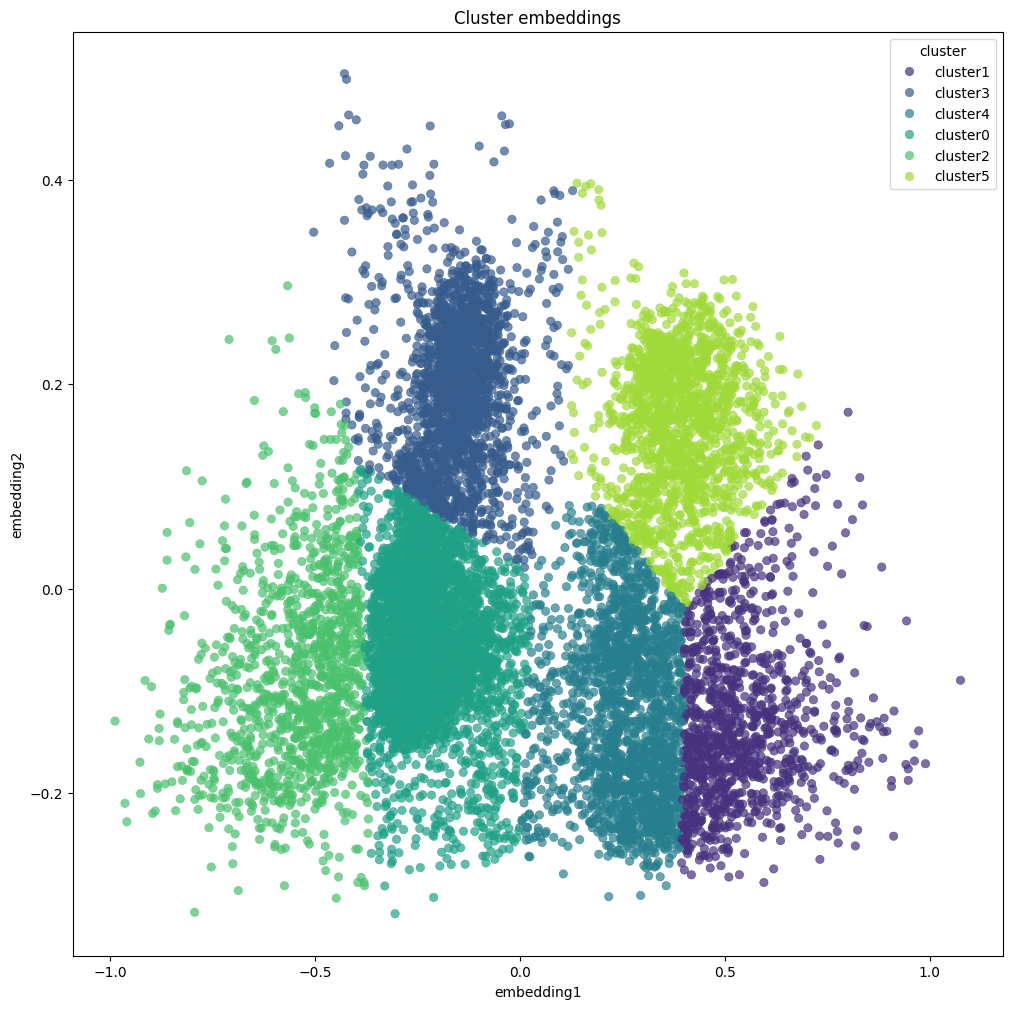

In [ ]:
top20games = df["Game"].unique()[:20].tolist()

if len(top20games) > 20:
    top20games = top20games[:20]

print(top20games)

def plot_clusters(hue):
    np.random.seed(0)  
    plt.figure(figsize=(12, 12))  
    plt.title("{} embeddings".format(hue).capitalize())  

    ax = sns.scatterplot(data=plot_df, x="embedding1", y="embedding2", hue=hue, palette="viridis", alpha=0.7, edgecolor=None)

    texts = []  
    limit = 0
    for i, point in plot_df.iterrows():
        if limit > 1000:  
            break
        if point["platform"] in top20games: 
            texts.append(plt.text(point['embedding1'] + 0.02, point['embedding2'] + 0.01, str(point["platform"])))

        limit += 1

    adjust_text(texts, arrowprops=dict(arrowstyle="->", color='red', linewidth=0.5))  
    plt.show()  

plot_clusters('cluster')

Первая визуализация 2D-эмбеддингов показывает естественные географические кластеры, которые можно рассматривать как форму "истинной" картины:

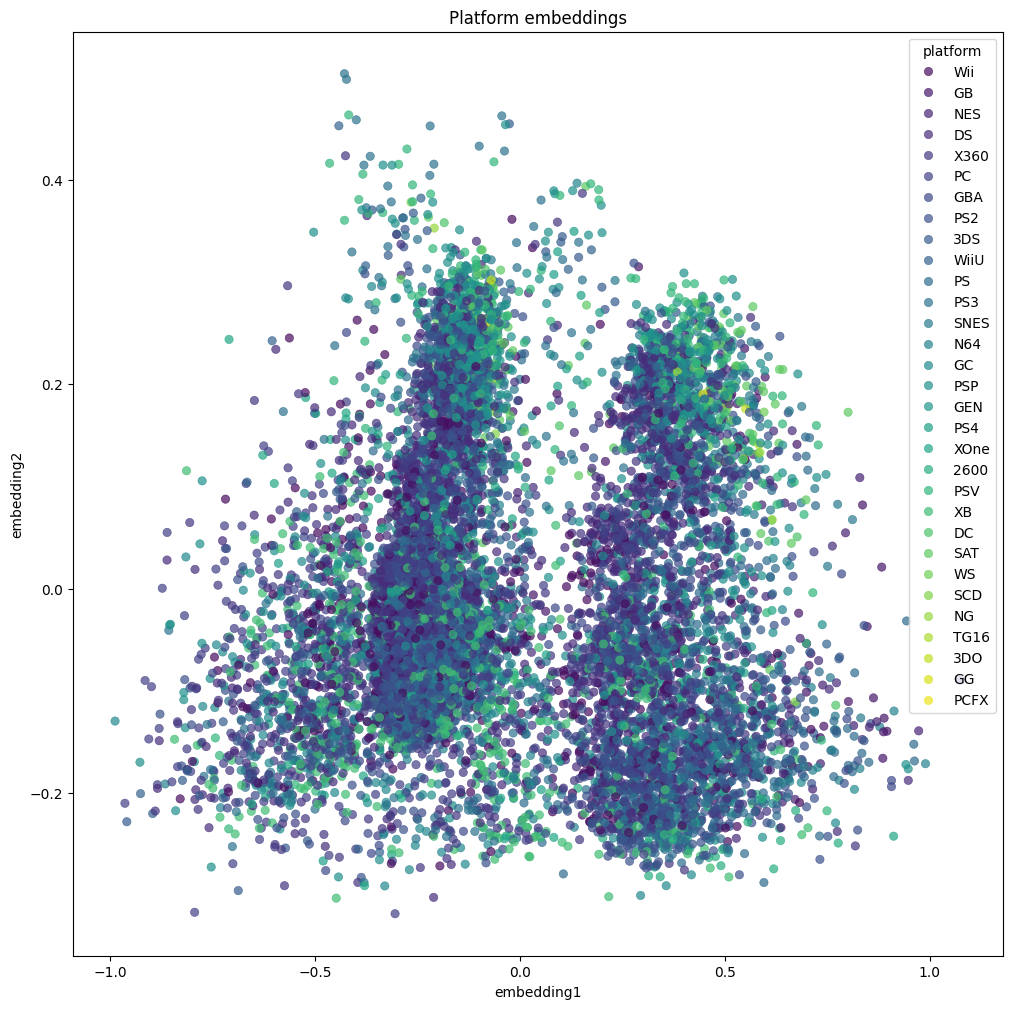

In [ ]:
plot_clusters("platform")

Видим, что эмбеддинги выявили географические сходства, даже несмотря на то, что эта информация не была явно указана в оригинальном наборе данных.

Отображаем те же 2D-эмбеддинги, но с кластерами, найденными с помощью K-Means:

Можно заметить, что K-Means обнаружил кластеры, очень похожие на естественные географические кластеры по континентам. Это показывает, что в 200-мерном пространстве эмбеддингов похожие команды располагаются близко друг к другу, что может быть выявлено алгоритмом кластеризации.

Наша оценка кластеров может быть более объективной с использованием метрики, такой как скорректированный индекс Рэнда, который варьируется от -1 до 1, где 0 означает случайное распределение меток, а 1 — идеальное совпадение.


In [58]:
from sklearn import metrics
metrics.adjusted_rand_score(plot_df.platform, plot_df.cluster)


0.02204762827250225

## Классификация

Используем эмбеддинги, чтобы предсказывать будущие матчи как задачу классификации.

Смоделируем её как многоклассовую задачу с тремя классами: победа домашней команды, поражение домашней команды, ничья.

Эмбеддинги используются непосредственно как признаки для классификатора XGBoost.

Сначала нам нужно определить целевую переменную:



In [ ]:
games = list(df['Genre'].unique())  

df["results"] = df['Genre'].apply(lambda g: games.index(g)).astype(int)

print(df.results.value_counts(normalize=True))

print(df[['Genre', 'results']].head())


8    0
0    0
5    0
3    0
6    0
10   0
2    0
1    0
7    0
9    0
11   0
4    0
Name: results, dtype: float64
          Genre  results
0        Sports        0
1      Platform        1
2        Racing        2
3        Sports        0
4  Role-Playing        3


In [ ]:
df.results.value_counts(normalize=True)

8    0
0    0
5    0
3    0
6    0
10   0
2    0
1    0
7    0
9    0
11   0
4    0
Name: results, dtype: float64

### Оригинальный датасет

Устанавливаем xgboost

In [63]:
%pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 1.0/124.9 MB 3.1 MB/s eta 0:00:40
    --------------------------------------- 1.6/124.9 MB 2.8 MB/s eta 0:00:45
    --------------------------------------- 1.6/124.9 MB 2.8 MB/s eta 0:00:45
    --------------------------------------- 1.6/124.9 MB 2.8 MB/s eta 0:00:45
    --------------------------------------- 1.8/124.9 MB 1.6 MB/s eta 0:01:16
    --------------------------------------- 1.8/124.9 MB 1.6 MB/s eta 0:01:16
    --------------------------------------- 2.1/124.9 MB 1.3 MB/s eta 0:01:33
    --------------------------------------- 2.4/124.9 MB 1.2 MB/s eta 0:01:40
    --------------------------------------- 2.4/124.9 MB 1.2 MB/s eta 0:01:40
    --------------------------------------- 2.6/124.9 MB 1.1 MB/s eta 0:01:50
    ---

In [66]:
new_df = df[["results"]].copy()
print(new_df)


       results
0            0
1            1
2            2
3            0
4            3
...        ...
16286        1
16287        6
16288        2
16289        4
16290        1

[16291 rows x 1 columns]


Применяем one hot кодирование


In [ ]:
import pandas as pd
import re

df = pd.read_csv('game_sales.csv')

df['Game'] = df['Game'].apply(lambda t: re.sub(r'[^a-zA-Zа-яА-Я_]', 'x', t) if isinstance(t, str) else t)
df['Platform'] = df['Platform'].apply(lambda t: re.sub(r'[^a-zA-Zа-яА-Я_]', 'x', t) if isinstance(t, str) else t)
df['Genre'] = df['Genre'].apply(lambda t: re.sub(r'[^a-zA-Zа-яА-Я_]', 'x', t) if isinstance(t, str) else t)

encoded_cols = pd.get_dummies(df[["Platform", "Genre"]])

encoded_cols


,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_GEN,Platform_GG,Platform_NES,Platform_NG,Platform_Nxx,...,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_RolexPlaying,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16286,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
16287,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
16288,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
16289,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
new_df = df.join(encoded_cols)

regex = re.compile(r"\[|\]|<", re.IGNORECASE)
new_df.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in new_df.columns.values]

new_df

,Game,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,"Publisher_mixi, Inc",Publisher_responDESIGN
0,Wii Sports,Wii,2006,Sports,Nintendo,"41,490,000",292000000,"3,770,000","8,460,000","82,740,000",...,0,0,0,0,0,0,0,0,0,0
1,Super Mario Bros.,NES,1985,Platform,Nintendo,"298,000,000",3580000,"6,810,000","770,000","40,240,000",...,0,0,0,0,0,0,0,0,0,0
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,"15,850,000",12880000,"3,790,000","3,310,000","35,820,000",...,0,0,0,0,0,0,0,0,0,0
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,"15,750,000",111000000,"3,280,000","2,960,000","33,000,000",...,0,0,0,0,0,0,0,0,0,0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,"11,270,000",8890000,"10,220,000","1,000,000","31,370,000",...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16286,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,"1,000,000",0,0,0,"1,000,000",...,0,0,0,0,0,0,0,0,0,0
16287,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,"1,000,000",0,0,0,"1,000,000",...,0,0,0,0,0,0,0,0,0,0
16288,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0,0,0,0,"1,000,000",...,0,0,0,0,0,0,0,0,0,0
16289,Know How 2,DS,2010,Puzzle,7G//AMES,0,1000000,0,0,"1,000,000",...,0,0,0,0,0,0,0,0,0,0
